In [1]:
import numpy as np
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import math
import os

262.0 262.0


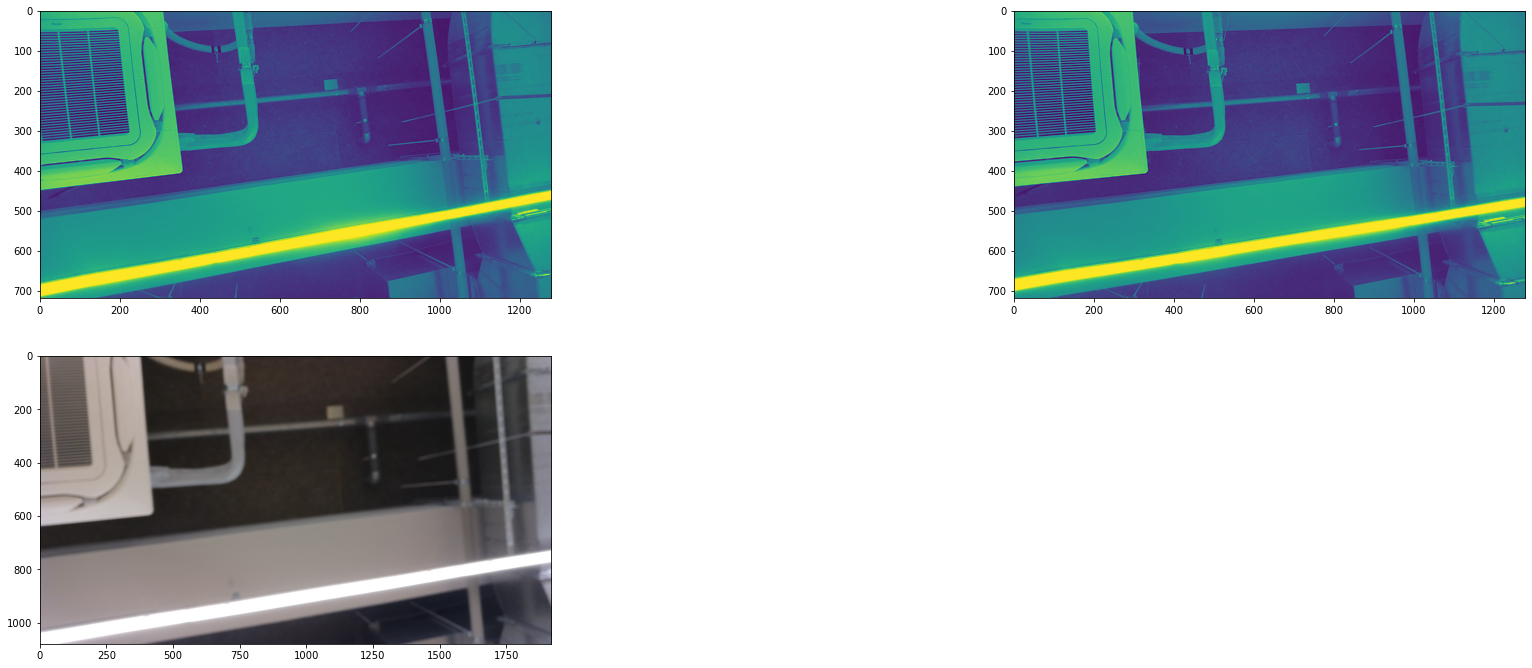

In [10]:
directory=6

left_movie = cv2.VideoCapture(f'movie/{directory}/left.mp4')
right_movie = cv2.VideoCapture(f'movie/{directory}/right.mp4')
rgb_movie = cv2.VideoCapture(f'movie/{directory}/color.mp4')

print(left_movie.get(cv2.CAP_PROP_FRAME_COUNT),right_movie.get(cv2.CAP_PROP_FRAME_COUNT))
l,r,c=getframes(230,display=True)

679 matches found


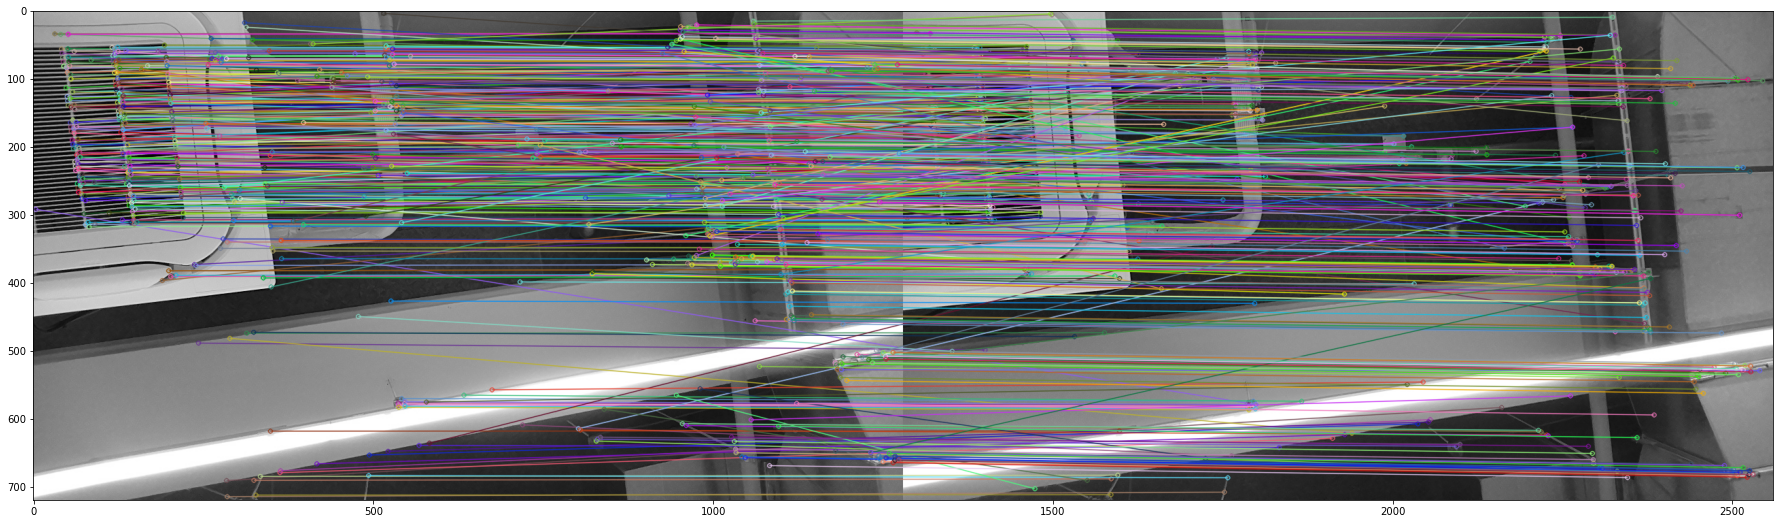

([<KeyPoint 0000021C61AC09C0>,
  <KeyPoint 0000021C5ADA6300>,
  <KeyPoint 0000021C60F12AB0>,
  <KeyPoint 0000021C60F12B10>,
  <KeyPoint 0000021C60F126F0>,
  <KeyPoint 0000021C6095C450>,
  <KeyPoint 0000021C60F7E270>,
  <KeyPoint 0000021C60C3B6F0>,
  <KeyPoint 0000021C60C3B9C0>,
  <KeyPoint 0000021C60C3B8A0>,
  <KeyPoint 0000021C60C3B7B0>,
  <KeyPoint 0000021C60C3BE70>,
  <KeyPoint 0000021C60C3B270>,
  <KeyPoint 0000021C60C3BF90>,
  <KeyPoint 0000021C60C3BDB0>,
  <KeyPoint 0000021C60C3B990>,
  <KeyPoint 0000021C60E22660>,
  <KeyPoint 0000021C60E226C0>,
  <KeyPoint 0000021C60E225D0>,
  <KeyPoint 0000021C60E22630>,
  <KeyPoint 0000021C60E22720>,
  <KeyPoint 0000021C60E226F0>,
  <KeyPoint 0000021C60E22570>,
  <KeyPoint 0000021C60E22990>,
  <KeyPoint 0000021C60E22960>,
  <KeyPoint 0000021C60E22930>,
  <KeyPoint 0000021C60E22A50>,
  <KeyPoint 0000021C60E22A80>,
  <KeyPoint 0000021C60E229F0>,
  <KeyPoint 0000021C60E22390>,
  <KeyPoint 0000021C60E22480>,
  <KeyPoint 0000021C60E22060>,
  <KeyPo

In [16]:
def akaze_compute(left_frame,right_frame,display=False):
    akaze = cv2.SIFT_create() 
    akaze_left_kp, akaze_left_des = akaze.detectAndCompute(left_frame,None)
    akaze_right_kp, akaze_right_des = akaze.detectAndCompute(right_frame,None)
    akaze_bf = cv2.BFMatcher(crossCheck=True)
    akaze_matches = akaze_bf.match(akaze_left_des, akaze_right_des)
    akaze_matches = [i for i in akaze_matches if abs(akaze_left_kp[i.queryIdx].pt[1]-akaze_right_kp[i.trainIdx].pt[1])<335]
    if display:
        print(len(akaze_matches),"matches found")
        img_akaze = cv2.drawMatches(left_frame, akaze_left_kp, right_frame,akaze_right_kp, akaze_matches, None, flags=2)
        plt.figure(figsize=(32,9))
        plt.imshow(img_akaze)
        plt.show()
    return akaze_left_kp, akaze_left_des,akaze_right_kp, akaze_right_des,akaze_matches
akaze_compute(l,r,display=True)

In [3]:
def getframes(frame_num,display=False):
    left_movie.set(cv2.CAP_PROP_POS_FRAMES,frame_num)
    right_movie.set(cv2.CAP_PROP_POS_FRAMES,frame_num)
    rgb_movie.set(cv2.CAP_PROP_POS_FRAMES,frame_num)

    
    left_ret, left_frame = left_movie.read()
    right_ret, right_frame = right_movie.read()
    rgb_ret,rgb_frame = rgb_movie.read()

    left_frame =cv2.cvtColor(left_frame, cv2.COLOR_BGR2GRAY)
    right_frame =cv2.cvtColor(right_frame, cv2.COLOR_BGR2GRAY)
    rgb_frame = cv2.cvtColor(rgb_frame,cv2.COLOR_BGRA2RGB)

    
    if display:
        plt.figure(figsize=(32,18))
        plt.subplot(321).imshow(left_frame,vmin=0, vmax=255)
        plt.subplot(322).imshow(right_frame,vmin=0, vmax=255)
        plt.subplot(323).imshow(rgb_frame)
#         plt.subplot(325).imshow(depth_frame)
        plt.show()
    return left_frame,right_frame,rgb_frame